# Credit Card Approval 

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [112]:
independent_feature=pd.read_csv('application_record.csv')
print(independent_feature.shape)
independent_feature.head()

(438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1


In [113]:
dependent_feature=pd.read_csv('credit_record.csv')
print(dependent_feature.shape)
dependent_feature.head()

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


1. X --> No Loan for that month 
2. C --> Loan paid off that month 
3. 0 --> 1-29 days past due     
4. 1 --> 30-59 days past due
5. 2 --> 60-89 days past due *(risky customer)*
6. 3 --> 90-119 days overdue *(risky customer)*
7. 4 --> 120-149 days overdue *(risky customer)*
8. 5 --> bad debts, more than 150 days *(risky customer)*

In [114]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Bad_Debt', '2' : 'Bad_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
dependent_feature.replace({'STATUS' : convert_to}, inplace=True)
dependent_feature

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


In [115]:
dependent_feature = dependent_feature.drop('MONTHS_BALANCE', axis=1)

In [116]:
dependent_feature = dependent_feature.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)

In [117]:
dependent_feature

STATUS,Bad_Debt,Good_Debt
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


1. 1 --> credit card should be approved
2. 0 --> risky customer not be approved

In [118]:
dependent_feature['CREDIT_APPROVAL_STATUS'] = None
#dependent_feature.loc[(dependent_feature['Good_Debt'] > dependent_feature['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
dependent_feature.loc[(dependent_feature['Good_Debt'] > dependent_feature['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
#dependent_feature.loc[(dependent_feature['Neutral_Debt'] > dependent_feature['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
#dependent_feature.loc[(dependent_feature['Neutral_Debt'] > dependent_feature['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
dependent_feature.loc[(dependent_feature['Bad_Debt'] >= dependent_feature['Good_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
#dependent_feature.loc[(dependent_feature['Bad_Debt'] > dependent_feature['Neutral_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

In [119]:
dependent_feature

STATUS,Bad_Debt,Good_Debt,CREDIT_APPROVAL_STATUS
ID,,,
5001711,0,4,1
5001712,0,19,1
5001713,0,22,1
5001714,0,15,1
5001715,0,60,1
...,...,...,...
5150482,0,18,1
5150483,0,18,1
5150484,0,13,1


In [120]:
dependent_feature['CREDIT_APPROVAL_STATUS'].value_counts()

1    45800
0      185
Name: CREDIT_APPROVAL_STATUS, dtype: int64

In [121]:
dependent_feature = dependent_feature.drop(['Good_Debt','Bad_Debt'], axis=1)

In [122]:
dependent_feature

STATUS,CREDIT_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


In [123]:
data = pd.merge(independent_feature,dependent_feature,how='inner',on='ID')

In [124]:
print(data.shape)
data

(36457, 19)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2,1


In [125]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [126]:
data.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,1.000000,0.028878,-0.017667,0.056016,-0.038043,NaN,0.079215,0.009879,-0.046979,0.026624
CNT_CHILDREN,0.028878,1.000000,0.033691,0.339357,-0.229379,NaN,0.048091,-0.016291,0.015960,0.889114
AMT_INCOME_TOTAL,-0.017667,0.033691,1.000000,0.067908,-0.168611,NaN,-0.037746,0.017245,0.086681,0.023750
DAYS_BIRTH,0.056016,0.339357,0.067908,1.000000,-0.616213,NaN,0.179054,-0.028659,0.105625,0.304020
DAYS_EMPLOYED,-0.038043,-0.229379,-0.168611,-0.616213,1.000000,NaN,-0.242869,-0.007233,-0.085648,-0.221241
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.079215,0.048091,-0.037746,0.179054,-0.242869,NaN,1.000000,0.311644,-0.034838,0.064527
FLAG_PHONE,0.009879,-0.016291,0.017245,-0.028659,-0.007233,NaN,0.311644,1.000000,0.010455,-0.004221
FLAG_EMAIL,-0.046979,0.015960,0.086681,0.105625,-0.085648,NaN,-0.034838,0.010455,1.000000,0.014619
CNT_FAM_MEMBERS,0.026624,0.889114,0.023750,0.304020,-0.221241,NaN,0.064527,-0.004221,0.014619,1.000000


# Data cleaning 

In [127]:
#NULL values in data
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE           11323
ID                            0
DAYS_BIRTH                    0
CNT_FAM_MEMBERS               0
FLAG_EMAIL                    0
FLAG_PHONE                    0
FLAG_WORK_PHONE               0
FLAG_MOBIL                    0
DAYS_EMPLOYED                 0
NAME_HOUSING_TYPE             0
CODE_GENDER                   0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_INCOME_TYPE              0
AMT_INCOME_TOTAL              0
CNT_CHILDREN                  0
FLAG_OWN_REALTY               0
FLAG_OWN_CAR                  0
CREDIT_APPROVAL_STATUS        0
dtype: int64

##### We have null values in OCCUPATION_TYPE

<AxesSubplot:>

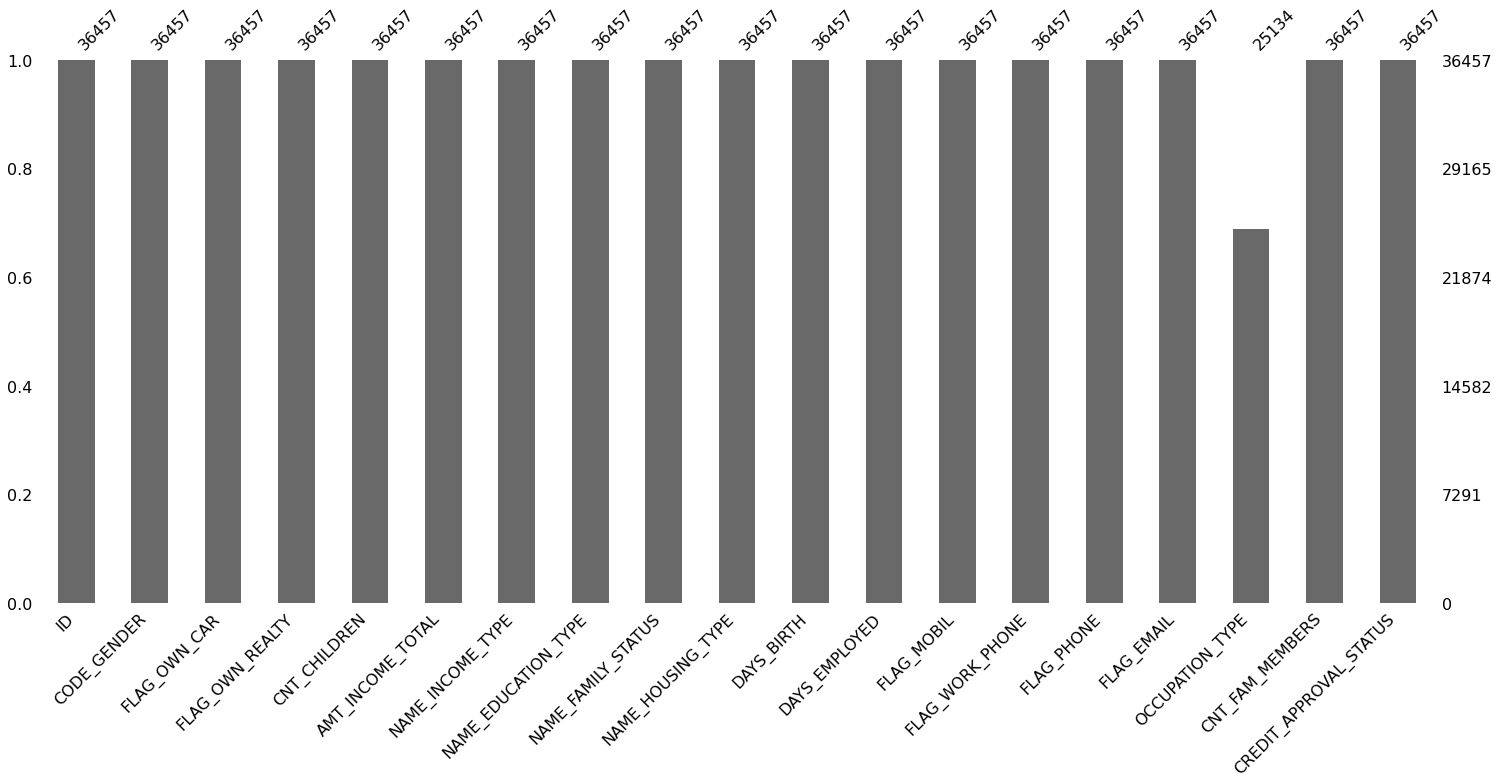

In [128]:
msno.bar(data)

##### We do not have any duplicate values

In [129]:
data.duplicated().sum()

0

In [130]:
data.drop('ID',inplace=True,axis=1)

##### FLAG_MOBIL column is not correlated to any feature so let's drop the that column

In [131]:
data.drop('FLAG_MOBIL',inplace=True,axis=1)

In [132]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,1
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,1
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,1


# Feature Engineering

##### Dealing with Missing Values


In [133]:
data.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE           11323
CODE_GENDER                   0
DAYS_BIRTH                    0
CNT_FAM_MEMBERS               0
FLAG_EMAIL                    0
FLAG_PHONE                    0
FLAG_WORK_PHONE               0
DAYS_EMPLOYED                 0
NAME_HOUSING_TYPE             0
FLAG_OWN_CAR                  0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_INCOME_TYPE              0
AMT_INCOME_TOTAL              0
CNT_CHILDREN                  0
FLAG_OWN_REALTY               0
CREDIT_APPROVAL_STATUS        0
dtype: int64

In [134]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [135]:
data['OCCUPATION_TYPE'].fillna('Other',inplace=True)

In [136]:
data['OCCUPATION_TYPE'].value_counts()

Other                    11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

<AxesSubplot:>

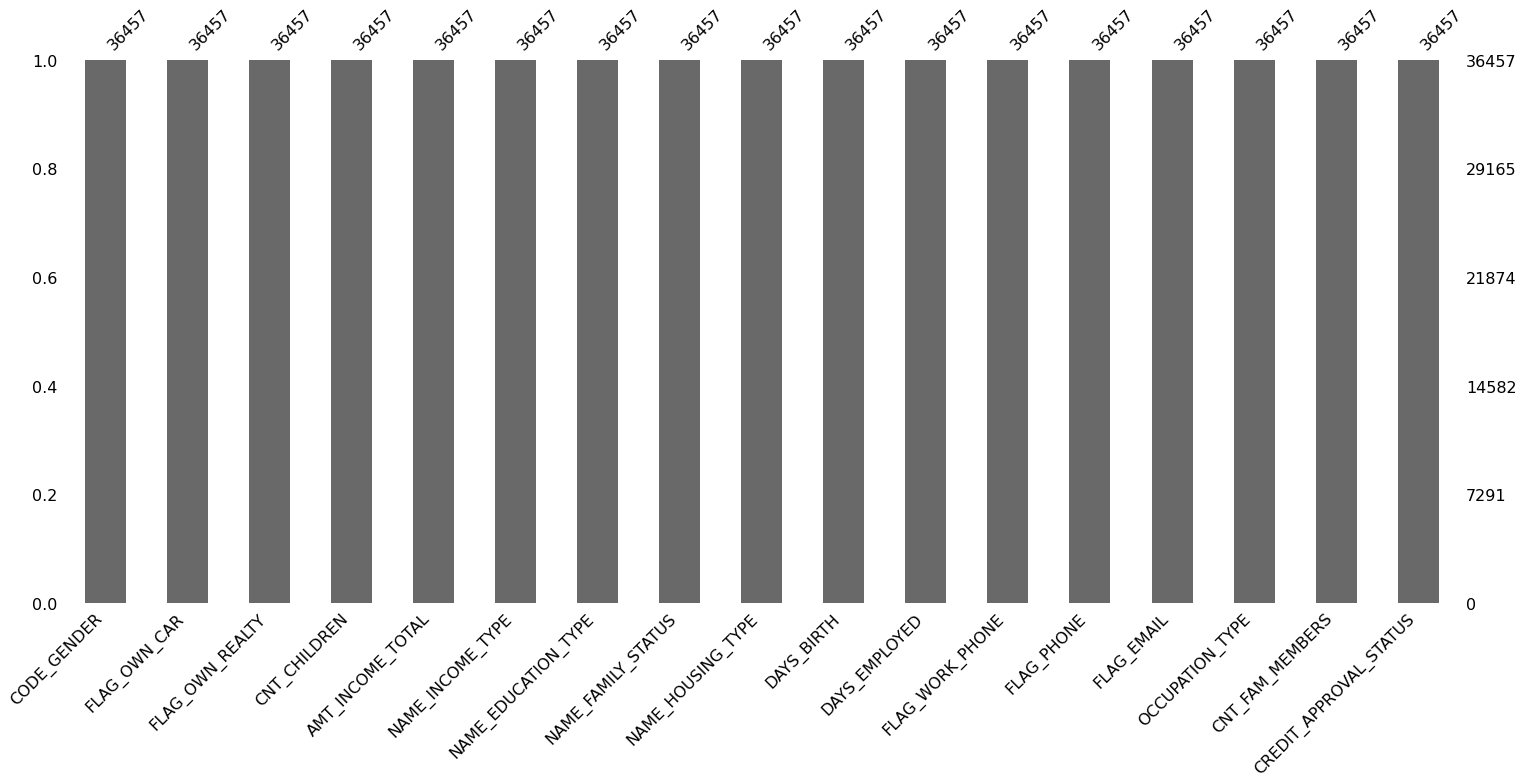

In [137]:
msno.bar(data)

##### Now we do not have any missing values

##### Converting to binary numbers

In [138]:
data['CODE_GENDER'] = data['CODE_GENDER'].replace(['F','M'],[0,1])
data['CODE_GENDER'].value_counts()

0    24430
1    12027
Name: CODE_GENDER, dtype: int64

In [139]:
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace(['N','Y'],[0,1])
print(data['FLAG_OWN_CAR'].value_counts())

0    22614
1    13843
Name: FLAG_OWN_CAR, dtype: int64


In [140]:
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace(['N','Y'],[0,1])
print(data['FLAG_OWN_REALTY'].value_counts())

1    24506
0    11951
Name: FLAG_OWN_REALTY, dtype: int64


In [141]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

In [142]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS
0,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2,1
1,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2,1
2,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,1
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,1
4,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,1


##### Dealing with negative dates

In [143]:
data['DAYS_BIRTH'].describe()

count    36457.000000
mean    -15975.173382
std       4200.549944
min     -25152.000000
25%     -19438.000000
50%     -15563.000000
75%     -12462.000000
max      -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [144]:
data['AGE'] = np.ceil(pd.to_timedelta(data['DAYS_BIRTH'], unit='D').dt.days / -365.25)

In [145]:
data['AGE'].describe()

count    36457.000000
mean        44.231368
std         11.504127
min         21.000000
25%         35.000000
50%         43.000000
75%         54.000000
max         69.000000
Name: AGE, dtype: float64

In [146]:
data['DAYS_EMPLOYED'].describe()

count     36457.000000
mean      59262.935568
std      137651.334859
min      -15713.000000
25%       -3153.000000
50%       -1552.000000
75%        -408.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

##### Days_employed also have positive values, so considering positive values as unemployed = 0

In [147]:
data.loc[(data['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
data['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(data['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)

In [148]:
data['YEARS_EMPLOYED'].describe()

count    36457.000000
mean         6.444496
std          6.570677
min         -0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         44.000000
Name: YEARS_EMPLOYED, dtype: float64

In [149]:
data.drop(['DAYS_EMPLOYED', 'DAYS_BIRTH'], axis=1, inplace=True)

In [150]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,AGE,YEARS_EMPLOYED
0,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2,1,33.0,13.0
1,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2,1,33.0,13.0
2,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,1,59.0,4.0
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,1,53.0,9.0
4,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,1,53.0,9.0


# Data Visualization

<AxesSubplot:>

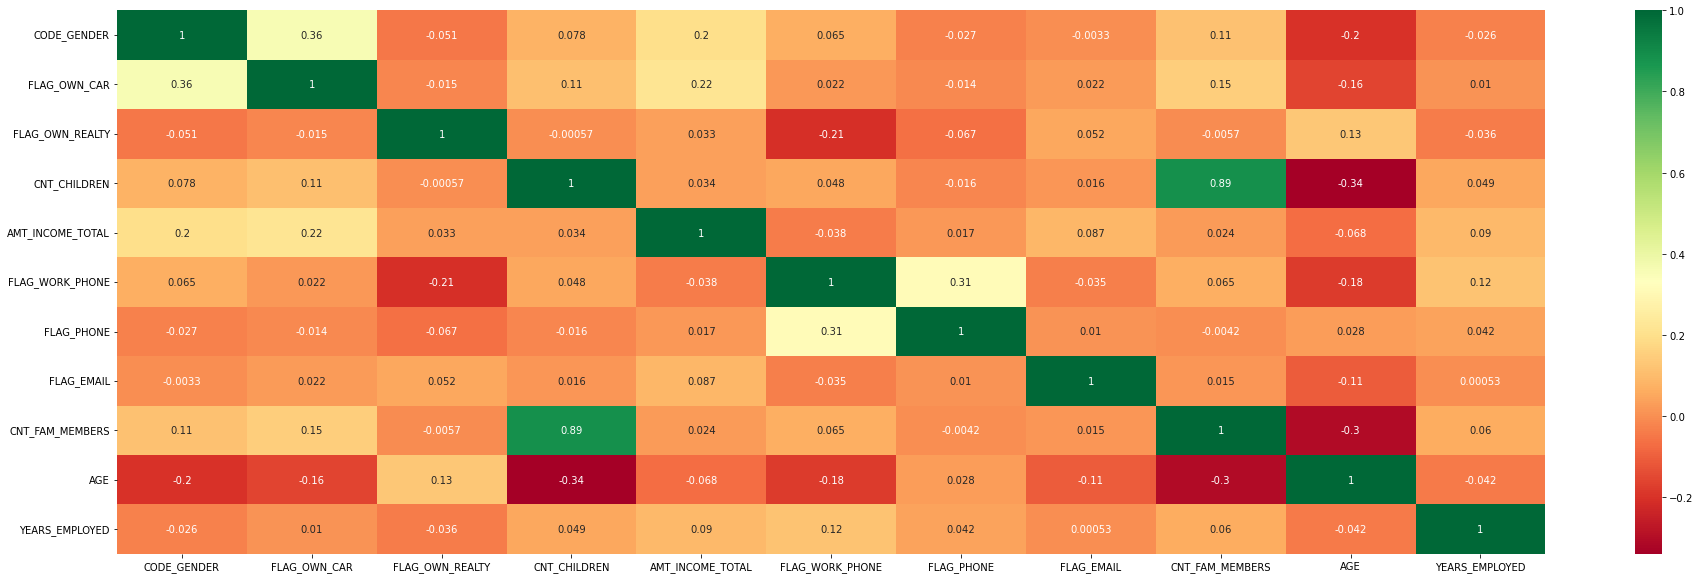

In [151]:
plt.figure(figsize=(32,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64


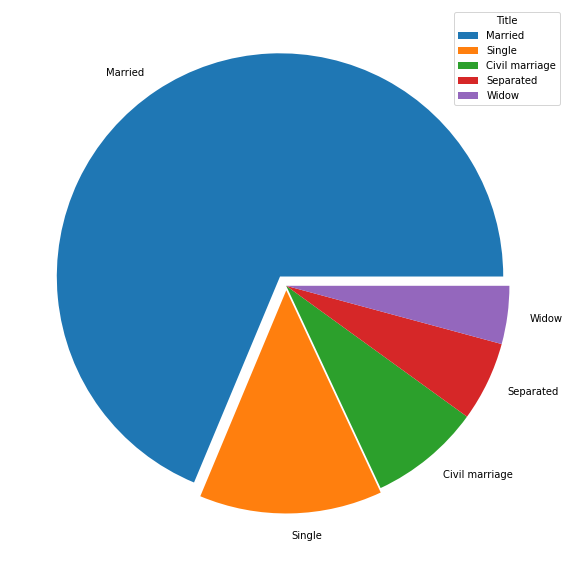

In [152]:
print(data['NAME_FAMILY_STATUS'].value_counts())
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_FAMILY_STATUS']=='Married'
m=m.sum()
s=data['NAME_FAMILY_STATUS']=='Single / not married'
s=s.sum()
Cv=data['NAME_FAMILY_STATUS']=='Civil marriage'
Cv=Cv.sum()
sep=data['NAME_FAMILY_STATUS']=='Separated'
sep=sep.sum()
w=data['NAME_FAMILY_STATUS']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64


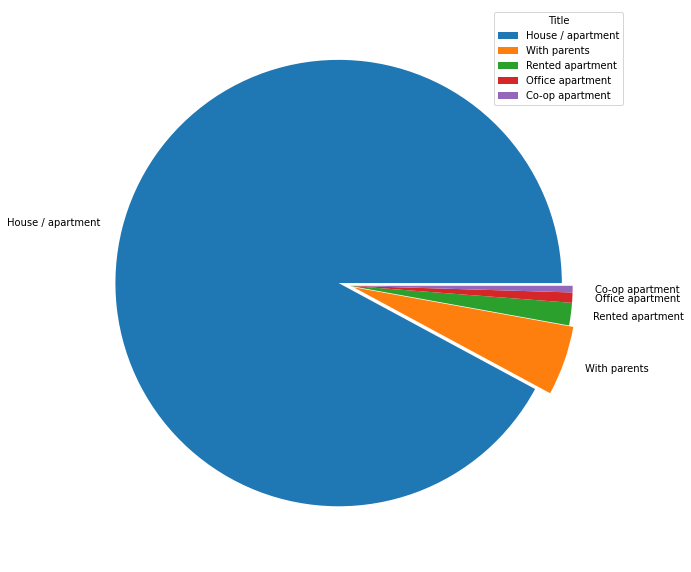

In [153]:
print(data['NAME_HOUSING_TYPE'].value_counts())
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['NAME_HOUSING_TYPE']=='House / apartment'
m=m.sum()
s=data['NAME_HOUSING_TYPE']=='With parents'
s=s.sum()
Cv=data['NAME_HOUSING_TYPE']=='Rented apartment'
Cv=Cv.sum()
sep=data['NAME_HOUSING_TYPE']=='Office apartment'
sep=sep.sum()
w=data['NAME_HOUSING_TYPE']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

In [154]:
#x=data['AGE']
#y=data['YEARS_EMPLOYED']
#plt.bar(x,y)

In [155]:
#def countplot_applicants(features):
#    for feature in features:
#        plt.figure(figsize=(9, 9))
#        ax=sns.countplot(y=data[feature], hue='CODE_GENDER' , data=data)
#        plt.legend(loc='best')
#        total = len(data[feature])
#        for p in ax.patches:
#            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
#            x = p.get_x() + p.get_width() + 0.02
#            y = p.get_y() + p.get_height()/2
#           ax.annotate(percentage, (x, y))
#    plt.show()

In [156]:
#countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])

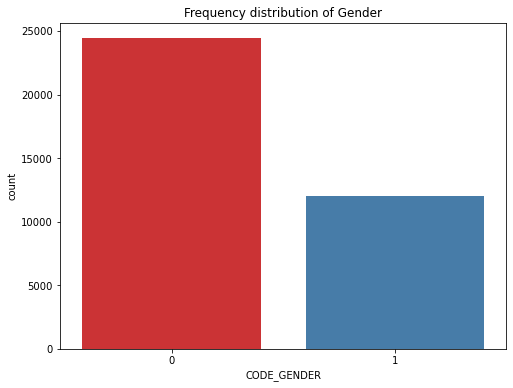

In [157]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='CODE_GENDER', data=data, palette="Set1")
ax.set_title("Frequency distribution of Gender")
plt.show()

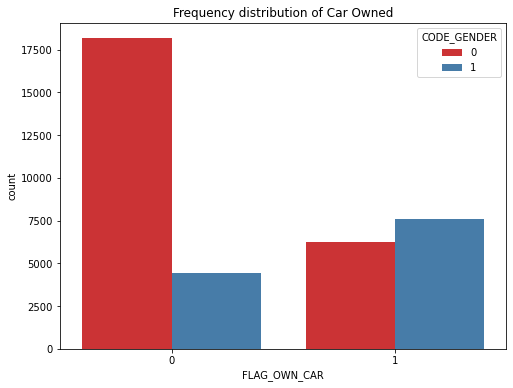

In [158]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="FLAG_OWN_CAR", hue='CODE_GENDER', data=data, palette="Set1")
ax.set_title("Frequency distribution of Car Owned")
plt.show()

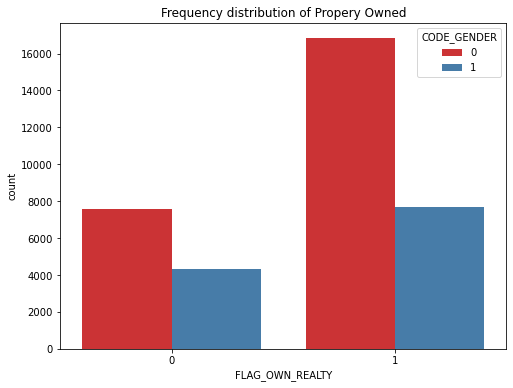

In [159]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="FLAG_OWN_REALTY", hue='CODE_GENDER', data=data, palette="Set1")
ax.set_title("Frequency distribution of Propery Owned")
plt.show()

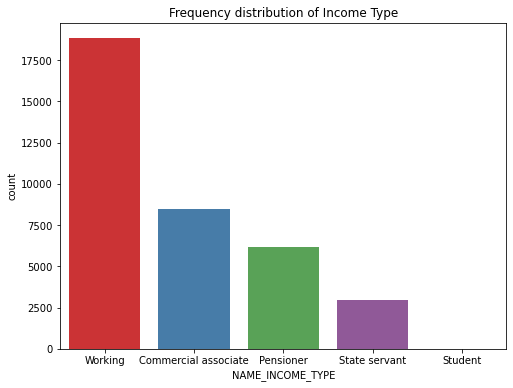

In [160]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='NAME_INCOME_TYPE', data=data, palette="Set1")
ax.set_title("Frequency distribution of Income Type")
plt.show()

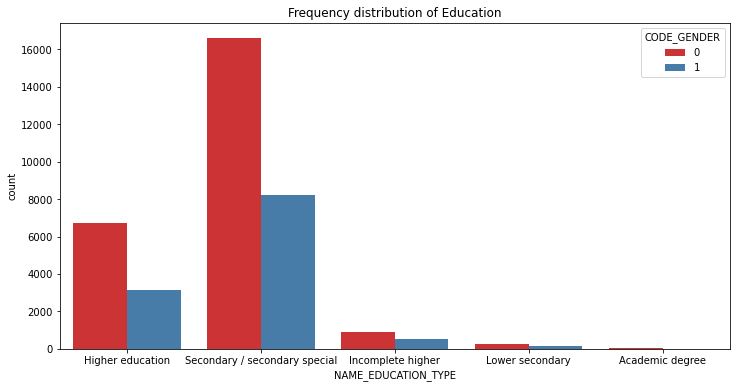

In [161]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', data=data, palette="Set1")
ax.set_title("Frequency distribution of Education")
plt.show()

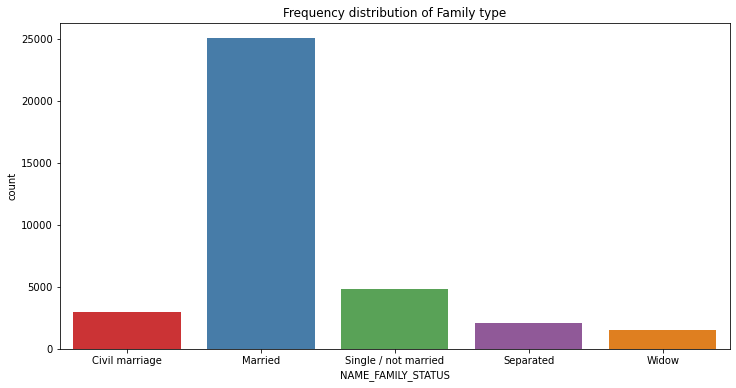

In [162]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x='NAME_FAMILY_STATUS', data=data, palette="Set1")
ax.set_title("Frequency distribution of Family type")
plt.show()

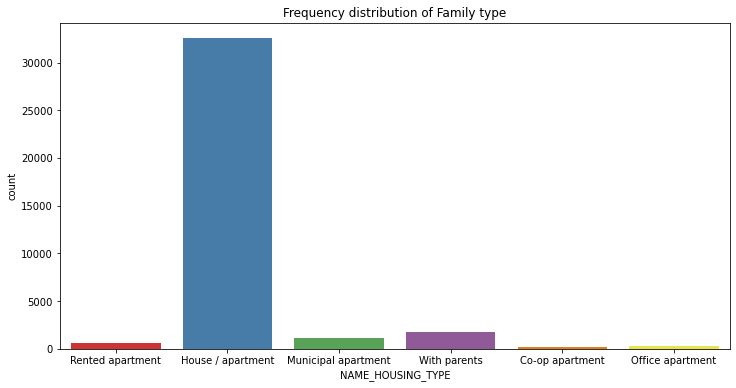

In [163]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x='NAME_HOUSING_TYPE', data=data, palette="Set1")
ax.set_title("Frequency distribution of Family type")
plt.show()

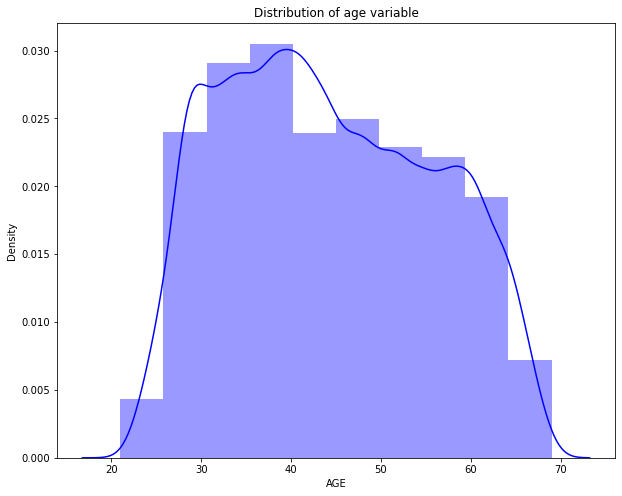

In [164]:
f, ax = plt.subplots(figsize=(10,8))
x = data['AGE']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

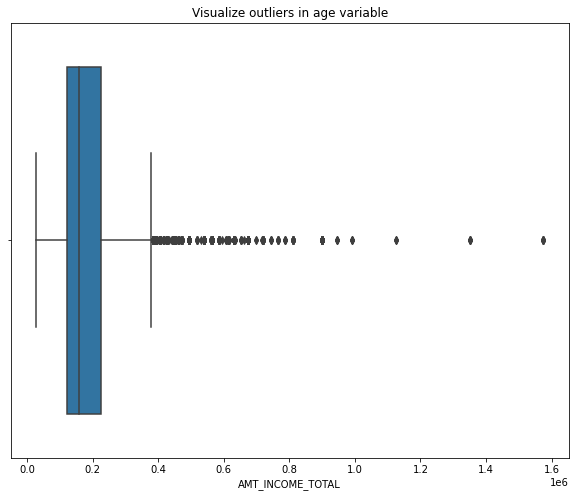

In [165]:
f, ax = plt.subplots(figsize=(10,8))
x = data['AMT_INCOME_TOTAL']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

##### We can see that there are lot of outliers in income column

# Feature Scaling
##### let's make all data in one scale,for that we have to first change the categorical data to numrical data

In [166]:
lst = {'Working':1,'Commercial associate':2,'Pensioner':3,'State servant':4,'Student':5}
lst1 = {'Secondary / secondary special':1,'Secondary':1 ,'Higher education':2,'Incomplete higher':3,'Lower secondary':4,'Academic degree':5}
lst2 = {'Married':1,'Single / not married':2,'Single':2,'Civil marriage':3,'Separated':4,'Widow':5}
lst3 = {'House / apartment':1,'With parents':2,'Municipal apartment':3,'Rented apartment':4,'Office apartment':5,'Co-op apartment':6}

#lst4  ={'Other':0,'Cleaning staff':1,'Cooking staff':2,'Drivers':3,'Laborers':4,'Low-skill Laborers':5,'Security staff':6,'Waiters/barmen staff':7,
#       'Accountants':8,'Core staff':9,'HR staff':10,'Medicine staff':11,'Private service staff':12,'Realty agents':13,'Sales staff':14,
#       'Secretaries':15,'Managers':16,'High skill tech staff':17,'IT staff':18}

In [167]:
#lets replace it into numerical value
data.replace({'NAME_INCOME_TYPE':lst},inplace=True)
data.replace({'NAME_EDUCATION_TYPE':lst1},inplace=True)
data.replace({'NAME_FAMILY_STATUS':lst2},inplace=True)
data.replace({'NAME_HOUSING_TYPE':lst3},inplace=True)
#data.replace({'OCCUPATION_TYPE':lst4},inplace=True)

In [168]:
data.loc[(data['OCCUPATION_TYPE']=='Cleaning staff') | (data['OCCUPATION_TYPE']=='Cooking staff') | (data['OCCUPATION_TYPE']=='Drivers') | (data['OCCUPATION_TYPE']=='Laborers') | (data['OCCUPATION_TYPE']=='Low-skill Laborers') | (data['OCCUPATION_TYPE']=='Security staff') | (data['OCCUPATION_TYPE']=='Waiters/barmen staff'),'OCCUPATION_TYPE']= 1
data.loc[(data['OCCUPATION_TYPE']=='Accountants') | (data['OCCUPATION_TYPE']=='Core staff') | (data['OCCUPATION_TYPE']=='HR staff') | (data['OCCUPATION_TYPE']=='Medicine staff') | (data['OCCUPATION_TYPE']=='Private service staff') | (data['OCCUPATION_TYPE']=='Realty agents') | (data['OCCUPATION_TYPE']=='Sales staff') | (data['OCCUPATION_TYPE']=='Secretaries'),'OCCUPATION_TYPE']= 2
data.loc[(data['OCCUPATION_TYPE']=='Managers') | (data['OCCUPATION_TYPE']=='High skill tech staff') | (data['OCCUPATION_TYPE']=='IT staff'),'OCCUPATION_TYPE']= 3
data.loc[(data['OCCUPATION_TYPE']=='Other'),'OCCUPATION_TYPE']=0
print(data['OCCUPATION_TYPE'].value_counts())

0    11323
1    10496
2    10183
3     4455
Name: OCCUPATION_TYPE, dtype: int64


In [169]:
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,AGE,YEARS_EMPLOYED
0,1,1,1,0,427500.0,1,2,3,4,1,0,0,0,2,1,33.0,13.0
1,1,1,1,0,427500.0,1,2,3,4,1,0,0,0,2,1,33.0,13.0
2,1,1,1,0,112500.0,1,1,1,1,0,0,0,1,2,1,59.0,4.0
3,0,0,1,0,270000.0,2,1,2,1,0,1,1,2,1,1,53.0,9.0
4,0,0,1,0,270000.0,2,1,2,1,0,1,1,2,1,1,53.0,9.0


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CODE_GENDER             36457 non-null  int64  
 1   FLAG_OWN_CAR            36457 non-null  int64  
 2   FLAG_OWN_REALTY         36457 non-null  int64  
 3   CNT_CHILDREN            36457 non-null  int64  
 4   AMT_INCOME_TOTAL        36457 non-null  float64
 5   NAME_INCOME_TYPE        36457 non-null  int64  
 6   NAME_EDUCATION_TYPE     36457 non-null  int64  
 7   NAME_FAMILY_STATUS      36457 non-null  int64  
 8   NAME_HOUSING_TYPE       36457 non-null  int64  
 9   FLAG_WORK_PHONE         36457 non-null  int64  
 10  FLAG_PHONE              36457 non-null  int64  
 11  FLAG_EMAIL              36457 non-null  int64  
 12  OCCUPATION_TYPE         36457 non-null  object 
 13  CNT_FAM_MEMBERS         36457 non-null  int64  
 14  CREDIT_APPROVAL_STATUS  36457 non-null

In [171]:
data['CREDIT_APPROVAL_STATUS'] = pd.to_numeric(data['CREDIT_APPROVAL_STATUS'])
data['OCCUPATION_TYPE'] = pd.to_numeric(data['OCCUPATION_TYPE'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CODE_GENDER             36457 non-null  int64  
 1   FLAG_OWN_CAR            36457 non-null  int64  
 2   FLAG_OWN_REALTY         36457 non-null  int64  
 3   CNT_CHILDREN            36457 non-null  int64  
 4   AMT_INCOME_TOTAL        36457 non-null  float64
 5   NAME_INCOME_TYPE        36457 non-null  int64  
 6   NAME_EDUCATION_TYPE     36457 non-null  int64  
 7   NAME_FAMILY_STATUS      36457 non-null  int64  
 8   NAME_HOUSING_TYPE       36457 non-null  int64  
 9   FLAG_WORK_PHONE         36457 non-null  int64  
 10  FLAG_PHONE              36457 non-null  int64  
 11  FLAG_EMAIL              36457 non-null  int64  
 12  OCCUPATION_TYPE         36457 non-null  int64  
 13  CNT_FAM_MEMBERS         36457 non-null  int64  
 14  CREDIT_APPROVAL_STATUS  36457 non-null

##### We can see that our all data in float or in int data types.Now we ready to apply FeatureScaling on our data.

In [172]:
x=data.drop('CREDIT_APPROVAL_STATUS',axis=1)
y=data['CREDIT_APPROVAL_STATUS']

In [173]:
feature_scale = [feature for feature in data.columns if feature!='CREDIT_APPROVAL_STATUS']
## Importing library 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [174]:
scaler.transform(x)

array([[1.        , 1.        , 1.        , ..., 0.05263158, 0.25      ,
        0.29545455],
       [1.        , 1.        , 1.        , ..., 0.05263158, 0.25      ,
        0.29545455],
       [1.        , 1.        , 1.        , ..., 0.05263158, 0.79166667,
        0.09090909],
       ...,
       [0.        , 0.        , 1.        , ..., 0.05263158, 0.27083333,
        0.09090909],
       [0.        , 0.        , 1.        , ..., 0.05263158, 0.60416667,
        0.04545455],
       [1.        , 0.        , 1.        , ..., 0.        , 0.10416667,
        0.09090909]])

In [175]:
data = pd.concat([data['CREDIT_APPROVAL_STATUS'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1)

In [176]:
data.head()

,CREDIT_APPROVAL_STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,1,1.0,1.0,1.0,0.0,0.258721,0.00,0.25,0.50,0.6,1.0,0.0,0.0,0.000000,0.052632,0.250000,0.295455
1,1,1.0,1.0,1.0,0.0,0.258721,0.00,0.25,0.50,0.6,1.0,0.0,0.0,0.000000,0.052632,0.250000,0.295455
2,1,1.0,1.0,1.0,0.0,0.055233,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.333333,0.052632,0.791667,0.090909
3,1,0.0,0.0,1.0,0.0,0.156977,0.25,0.00,0.25,0.0,0.0,1.0,1.0,0.666667,0.000000,0.666667,0.204545
4,1,0.0,0.0,1.0,0.0,0.156977,0.25,0.00,0.25,0.0,0.0,1.0,1.0,0.666667,0.000000,0.666667,0.204545


In [177]:
data['CREDIT_APPROVAL_STATUS'].value_counts()

1    36290
0      167
Name: CREDIT_APPROVAL_STATUS, dtype: int64

# Dealing with Unbalanced Dataset

##### We can clearly see that there is data imbalance. There is more data on credit card approval than rejection. Hence upsamling the data to remove data bais

In [178]:
import imblearn
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=12)

In [179]:
data.shape

(36457, 17)

In [180]:
x_res,y_res=smk.fit_resample(x,y)

In [181]:
x_res.shape

(72542, 16)

In [182]:
x_res.shape

(72542, 16)

In [183]:
from collections import Counter
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({1: 36290, 0: 167})
Resampled dataset shape Counter({1: 36271, 0: 36271})


# Model

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=567)
x_train.shape,y_train.shape

((25519, 16), (25519,))

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score

# Logistic Regression

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=567)
x_train.shape,y_train.shape

((58033, 16), (58033,))

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

logreg1 = LogisticRegression() 
logreg1.fit(x_train, y_train)

y_test_pred = logreg1.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Accuracy score: 0.5138879316286443


In [188]:
from sklearn.metrics import confusion_matrix
logreg_matrix1 = confusion_matrix(y_test, y_test_pred)
logreg_matrix1

array([[2100, 5137],
       [1916, 5356]], dtype=int64)

In [189]:
print("Confusion Matrix for Logistic Regression:")
print("TP is:", logreg_matrix1[1, 1])
print("TN is:", logreg_matrix1[0, 0])
print("FP is:", logreg_matrix1[0, 1])
print("FN is:", logreg_matrix1[1, 0])
#ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

Confusion Matrix for Logistic Regression:
TP is: 5356
TN is: 2100
FP is: 5137
FN is: 1916


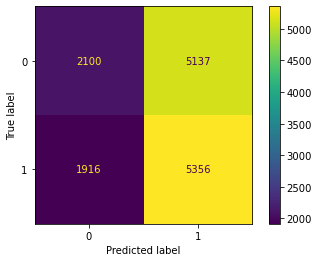

In [190]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)

In [191]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.5104355284475365
Recall score: 0.7365236523652365
Accuracy score: 0.5138879316286443
F1 score: 0.6029833943146636


In [192]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', logreg1.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-logreg1.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean Absolute Error =  0.48611206837135573
Mean Square Error MSE =  0.48611206837135573
R-Squared =  0.5138879316286443
Adjusted R-Squared =  0.5133512359969895


Text(0, 0.5, 'Precision')

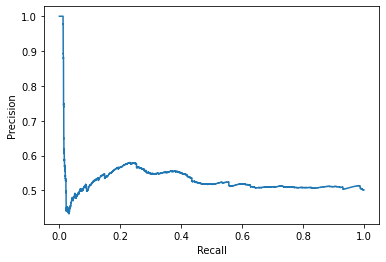

In [193]:
from sklearn.metrics import precision_recall_curve
logreg1.predict_proba(x_test)  # 1 - pihat, pihat
prob_test = logreg1.predict_proba(x_test)[:, 1]
# S2. Collect Necessary Measures
precision, recall, thred = precision_recall_curve(y_test, prob_test)
# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression() 
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_clf = clf.fit(x_train,y_train)
best_clf.best_estimator_

print (f'Accuracy - : {best_clf.score(x_test,y_test):.3f}')

#print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [ ]:
best_clf.best_estimator_

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

logreg1 = LogisticRegression(C=0.004832930238571752, penalty='l1', solver='liblinear') 
logreg1.fit(x_train, y_train)

y_test_pred = logreg1.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
logreg_matrix = confusion_matrix(y_test, y_test_pred)
logreg_matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
print("Confusion Matrix for Logistic Regression with Hyperparameter tuning:")
print("TP is:", logreg_matrix[1, 1])
print("TN is:", logreg_matrix[0, 0])
print("FP is:", logreg_matrix[0, 1])
print("FN is:", logreg_matrix[1, 0])

In [405]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.7606874023576197
Recall score: 0.7365236523652365
Accuracy score: 0.7518092218622924
F1 score: 0.748410535876476


In [406]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', logreg1.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-logreg1.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean Absolute Error =  0.24819077813770762
Mean Square Error MSE =  0.24819077813770762
R-Squared =  0.7518092218622924
Adjusted R-Squared =  0.7515352049943512


Text(0, 0.5, 'Precision')

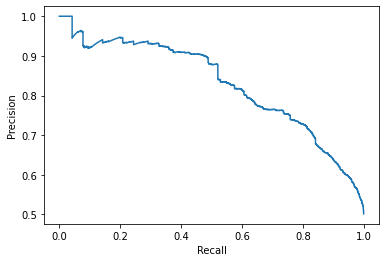

In [407]:
from sklearn.metrics import precision_recall_curve
logreg1.predict_proba(x_test)  # 1 - pihat, pihat
prob_test = logreg1.predict_proba(x_test)[:, 1]
# S2. Collect Necessary Measures
precision, recall, thred = precision_recall_curve(y_test, prob_test)
# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

# K Nearest Neighbors

In [412]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(1)

knn.fit(x_train,y_train)

y_test_pred = knn.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Accuracy score: 0.9904886622096629


In [443]:
acc = []
k_values = []
for i in range(1,40,1):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    y_test_pred = knn.predict(x_test)
    a = accuracy_score(y_test, y_test_pred)
    acc.append(a)
    k_values.append(i)
    #dictt = {i:a}
    #print('Accuracy score:', a)

Text(0, 0.5, 'Accuracy')

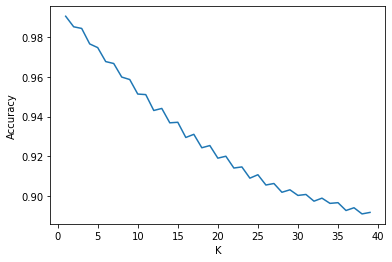

In [444]:

plt.plot(k_values,acc)
plt.xlabel("K")
plt.ylabel("Accuracy")

In [366]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

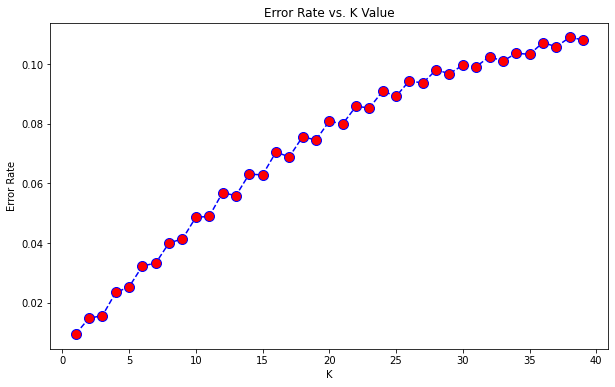

In [367]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Confusion Matrix for KNN:
TP is: 7168
TN is: 7203
FP is: 34
FN is: 104


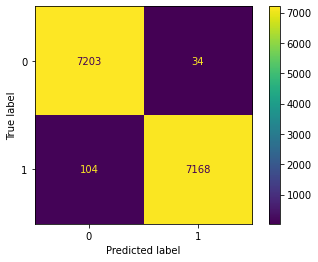

In [413]:
knn_matrix = confusion_matrix(y_test, y_test_pred)
knn_matrix

ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
print("Confusion Matrix for KNN:")
print("TP is:", knn_matrix[1, 1])
print("TN is:", knn_matrix[0, 0])
print("FP is:", knn_matrix[0, 1])
print("FN is:", knn_matrix[1, 0])


In [414]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.995279089141905
Recall score: 0.9856985698569857
Accuracy score: 0.9904886622096629
F1 score: 0.9904656625673621


In [415]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', knn.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-knn.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

Mean Absolute Error =  0.009511337790337032
Mean Square Error MSE =  0.009511337790337032
R-Squared =  0.9904886622096629
Adjusted R-Squared =  0.9904781611466871


Text(0, 0.5, 'Precision')

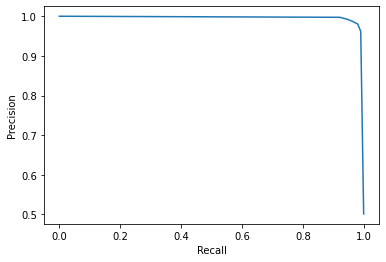

In [257]:
from sklearn.metrics import precision_recall_curve
knn.predict_proba(x_test)  # 1 - pihat, pihat
prob_test = knn.predict_proba(x_test)[:, 1]
# S2. Collect Necessary Measures
precision, recall, thred = precision_recall_curve(y_test, prob_test)
# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [340]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_knn = {'n_neighbors': range(1, 26, 1)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(x_train, y_train)
# the best hyperparameter chosen:
print("Best k is:", grid_knn.best_params_)
# When k=25 (best case), the validation score of through CV is:
print("Mean validation score is:", grid_knn.best_score_)

Best k is: {'n_neighbors': 1}
Mean validation score is: 0.9878517528678203


# Random Forest

In [422]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 185)

rf.fit(x_train, y_train)

y_test_pred = rf.predict(x_test)

print('Accuracy score:', accuracy_score(y_test, y_test_pred))

Accuracy score: 0.9973120132331657


Confusion Matrix for Random Forest Classifier:
TP is: 7251
TN is: 7219
FP is: 18
FN is: 21


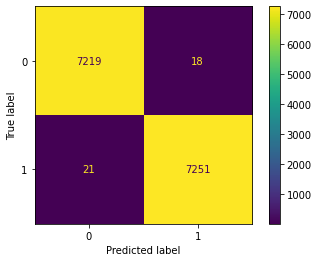

In [423]:
rf_matrix = confusion_matrix(y_test, y_test_pred)
rf_matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
print("Confusion Matrix for Random Forest Classifier:")
print("TP is:", rf_matrix[1, 1])
print("TN is:", rf_matrix[0, 0])
print("FP is:", rf_matrix[0, 1])
print("FN is:", rf_matrix[1, 0])

In [424]:
mae = np.sum(abs(y_test - y_test_pred))/y_test.shape[0]
mse = np.sum((y_test - y_test_pred)**2)/y_test.shape[0]
print('Mean Absolute Error = ', mae)
print('Mean Square Error MSE = ',mse)
print('R-Squared = ', rf.score(x_test,y_test))
print('Adjusted R-Squared = ', 1 - (1-rf.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('F1 score:', f1_score(y_test, y_test_pred))

Mean Absolute Error =  0.002687986766834379
Mean Square Error MSE =  0.002687986766834379
R-Squared =  0.9973120132331657
Adjusted R-Squared =  0.997309045541455
F1 score: 0.9973179286156385


AttributeError: 'list' object has no attribute 'axes'

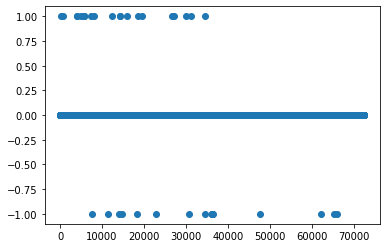

In [441]:
#g=plt.scatter(y_test, y_test_pred)
g=plt.plot(y_test - y_test_pred,marker='o',linestyle='')
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

In [432]:
y_test.head()
y_test_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [383]:
rf.feature_importances_

array([0.02137102, 0.04824661, 0.06611344, 0.03961355, 0.16112148,
       0.06363917, 0.02353153, 0.04056937, 0.01735374, 0.0472494 ,
       0.03801978, 0.01499359, 0.05179215, 0.0513497 , 0.13912139,
       0.17591409])

In [371]:
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

YEARS_EMPLOYED         0.177783
AMT_INCOME_TOTAL       0.161562
AGE                    0.139420
FLAG_OWN_REALTY        0.064739
NAME_INCOME_TYPE       0.062903
OCCUPATION_TYPE        0.050134
CNT_FAM_MEMBERS        0.048428
FLAG_OWN_CAR           0.047139
FLAG_WORK_PHONE        0.045699
CNT_CHILDREN           0.043346
NAME_FAMILY_STATUS     0.041058
FLAG_PHONE             0.039443
NAME_EDUCATION_TYPE    0.024428
CODE_GENDER            0.021359
NAME_HOUSING_TYPE      0.017682
FLAG_EMAIL             0.014875
dtype: float64

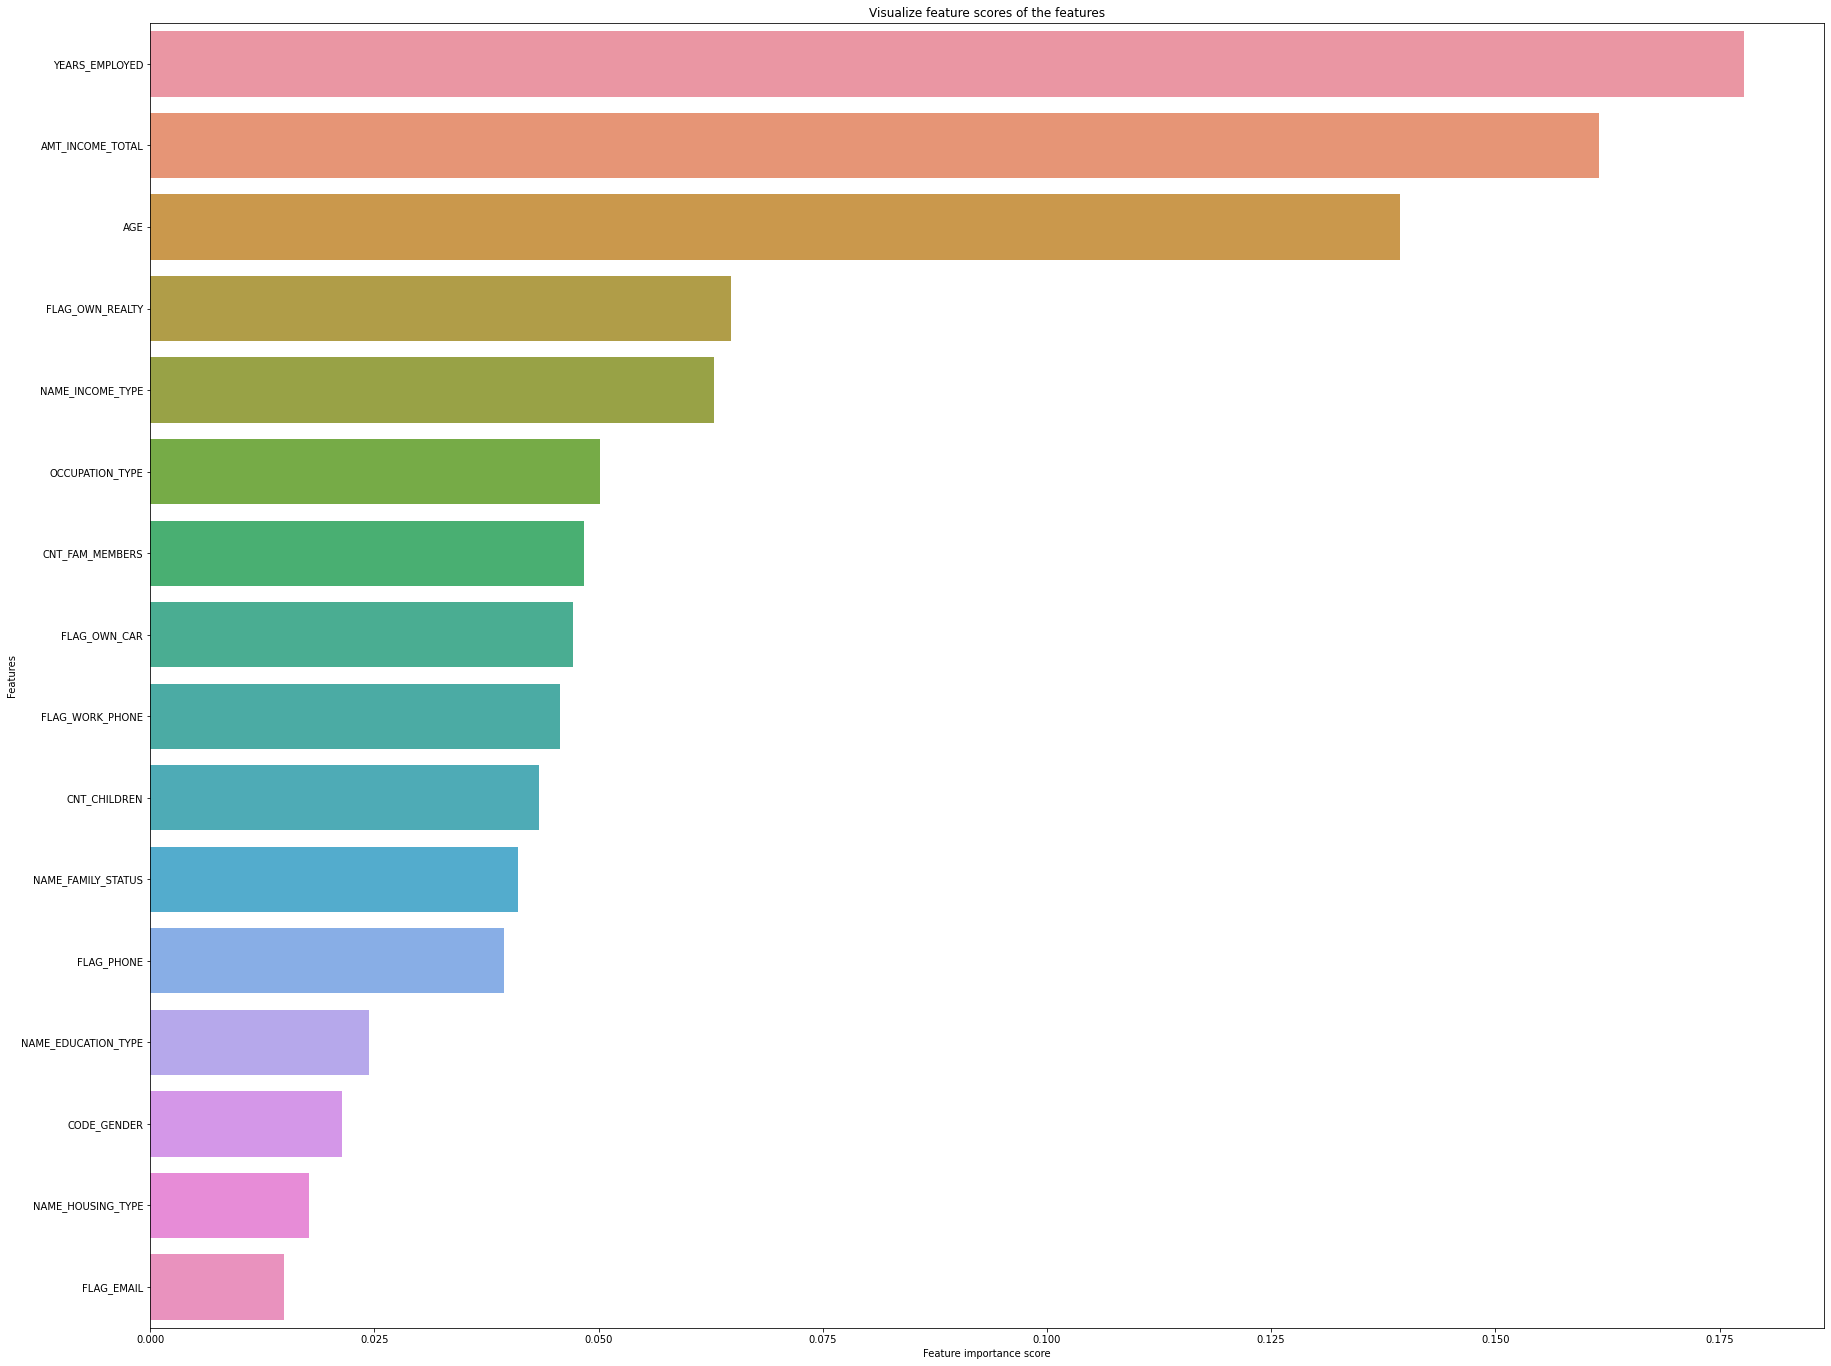

In [372]:
import seaborn as sns
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [442]:
from sklearn.model_selection import GridSearchCV

param_rf = {'n_estimators': range(180, 190, 5)}

#apply grid search
grid_rf = GridSearchCV(rf, param_rf, cv = 5)
grid_rf.fit(x_train, y_train)
# the best hyperparameter chosen:
print("Best n_estimator is:", grid_rf.best_params_)

print("Mean validation score is:", grid_rf.best_score_)

Best n_estimator is: {'n_estimators': 185}
Mean validation score is: 0.9959678108165934
